In [89]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
def find_duplicate_columns(df):
    duplicates = []
    for i in range(df.shape[1]):
        col1 = df.iloc[:, i]
        for j in range(i + 1, df.shape[1]):
            col2 = df.iloc[:, j]
            if col1.equals(col2):
                duplicates.append((df.columns[i], df.columns[j]))
    return duplicates

In [91]:
# Dictionary mapping full state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'D.C.',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'National': 'NA'
}

def get_state_abbreviation(state_name):
    return state_abbreviations.get(state_name, "Invalid state name")  #"Invalid state name is DC, Washington, D.C. (District of Columbia) - DC"

In [92]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
act_2017_common = pd.read_csv('data/act_2017.csv')
act_2018_df = pd.read_csv('data/act_2018.csv')
act_2019_df = pd.read_csv('data/act_2019.csv')
act_2024_common = pd.read_csv('data/average-act-score-by-state-2024.csv')

In [93]:
act_2017_common.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [94]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [95]:
act_2017_common.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [96]:
act_2017_common.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [97]:
act_2017_common.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [98]:
type(act_2017_common)

pandas.core.frame.DataFrame

In [99]:
act_2017_common.rename(columns={"State": "state", "Participation": "participation","English": "english","Math": "math","Reading": "reading","Science": "science","Composite": "composite"}, inplace=True)

In [100]:
act_2017_common['year'] = 2017

In [101]:
act_2017_common['state_abbr'] = act_2017_common['state'].apply(get_state_abbreviation)

In [102]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     object 
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     object 
 7   year           52 non-null     int64  
 8   state_abbr     52 non-null     object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.8+ KB


In [103]:
# replace value of column Composite '20.2x' ==> 20.2 

act_2017_common.replace({'20.2x': 20.2}, inplace=True)

In [104]:
act_2017_common.shape

(52, 9)

In [105]:
act_2017_common['participation'] = act_2017_common['participation'].str.rstrip('%').astype(int)
# act_2017_df['Participation'] = act_2017_df['Participation'] / 100  #Option for a decimal percent

In [106]:
act_2017_common.head()

,state,participation,english,math,reading,science,composite,year,state_abbr
0,National,60,20.3,20.7,21.4,21.0,21.0,2017,NA
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,2017,AL
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,2017,AK
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,2017,AZ
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,2017,AR


In [107]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2017_common.to_csv("data/act_2017_cleaned.csv", index=False)

### Data act_2018

In [108]:
act_2018_df.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [109]:
act_2018_df['Year'] = 2018

In [110]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
 3   Year           52 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [111]:
act_2018_df.rename(columns={"State": "state", "Participation": "participation","Composite": "composite","Year": "year"}, inplace=True)

In [112]:
act_2018_df['state_abbr'] = act_2018_df['state'].apply(get_state_abbreviation)

In [113]:
act_2018_df['participation'] = act_2018_df['participation'].str.rstrip('%').astype(int)

In [114]:
act_2018_df.drop_duplicates(inplace=True)

In [115]:
act_2018_df.shape

(51, 5)

In [116]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     int32  
 2   composite      51 non-null     float64
 3   year           51 non-null     int64  
 4   state_abbr     51 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 2.2+ KB


In [117]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2018_df.to_csv("data/act_2018_cleaned.csv", index=False)

### act_2019

In [118]:
act_2019_df.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [119]:
act_2019_df['Year'] = 2019

In [120]:
act_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
 3   Year           52 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [121]:
act_2019_df.shape

(52, 4)

In [122]:
act_2019_df.isnull().sum()

State            0
Participation    0
Composite        0
Year             0
dtype: int64

In [123]:
act_2019_df.drop_duplicates(inplace=True)

In [124]:
act_2019_df.rename(columns={"State": "state", "Participation": "participation","Composite": "composite","Year": "year"}, inplace=True)

In [125]:
act_2019_df['state_abbr'] = act_2019_df['state'].apply(get_state_abbreviation)

In [126]:
act_2019_df['participation'] = act_2019_df['participation'].str.rstrip('%').astype(int)

In [127]:
act_2019_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     int32  
 2   composite      52 non-null     float64
 3   year           52 non-null     int64  
 4   state_abbr     52 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 2.0+ KB


In [128]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2019_df.to_csv("data/act_2019_cleaned.csv", index=False)

### act_2024

In [129]:
act_2024_common.head()

,state,AverageACTScorePercentOfGraduatesTested,AverageACTScoreComposite,AverageACTScoreEnglish,AverageACTScoreMath,AverageACTScoreReading,AverageACTScoreScience
0,Alabama,100,18.0,17.3,17.4,18.5,18.2
1,Alaska,14,20.4,19.3,20.0,21.4,20.4
2,Arizona,64,18.4,17.3,18.5,18.8,18.5
3,Arkansas,93,18.8,18.3,18.1,19.2,19.1
4,California,4,26.5,26.9,25.6,27.3,25.8


In [130]:
act_2024_common['Year'] = 2024

In [131]:
act_2024_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   state                                    51 non-null     object 
 1   AverageACTScorePercentOfGraduatesTested  51 non-null     int64  
 2   AverageACTScoreComposite                 51 non-null     float64
 3   AverageACTScoreEnglish                   51 non-null     float64
 4   AverageACTScoreMath                      51 non-null     float64
 5   AverageACTScoreReading                   51 non-null     float64
 6   AverageACTScoreScience                   51 non-null     float64
 7   Year                                     51 non-null     int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 3.3+ KB


In [132]:
act_2024_common.isnull().sum()

state                                      0
AverageACTScorePercentOfGraduatesTested    0
AverageACTScoreComposite                   0
AverageACTScoreEnglish                     0
AverageACTScoreMath                        0
AverageACTScoreReading                     0
AverageACTScoreScience                     0
Year                                       0
dtype: int64

In [133]:
act_2024_common.rename(columns={"State": "state", "AverageACTScorePercentOfGraduatesTested": "participation","AverageACTScoreComposite": "composite","AverageACTScoreEnglish":"english","AverageACTScoreMath": "math","AverageACTScoreReading": "reading","AverageACTScoreScience": "science" ,"Year": "year"}, inplace=True)

In [134]:
act_2024_common['state_abbr'] = act_2024_common['state'].apply(get_state_abbreviation)

In [135]:
act_2024_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     int64  
 2   composite      51 non-null     float64
 3   english        51 non-null     float64
 4   math           51 non-null     float64
 5   reading        51 non-null     float64
 6   science        51 non-null     float64
 7   year           51 non-null     int64  
 8   state_abbr     51 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 3.7+ KB


In [136]:
# We can write all this work back to a csv file if we wish to.
# Write the cleaned up Pandas DataFrame to a comma-separated values (csv) file.
act_2024_common.to_csv("data/act_2024_cleaned.csv", index=False)

### Concaternate act_2017 act_2018 act_2019 and act_2024

In [137]:
act_2024_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          51 non-null     object 
 1   participation  51 non-null     int64  
 2   composite      51 non-null     float64
 3   english        51 non-null     float64
 4   math           51 non-null     float64
 5   reading        51 non-null     float64
 6   science        51 non-null     float64
 7   year           51 non-null     int64  
 8   state_abbr     51 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 3.7+ KB


In [138]:
act_2017_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          52 non-null     object 
 1   participation  52 non-null     int32  
 2   english        52 non-null     float64
 3   math           52 non-null     float64
 4   reading        52 non-null     float64
 5   science        52 non-null     float64
 6   composite      52 non-null     object 
 7   year           52 non-null     int64  
 8   state_abbr     52 non-null     object 
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 3.6+ KB


In [139]:
# act_2017_common  # Selecting specific columns to create a new DataFrame
selected_columns = ['state', 'participation', 'composite', 'year', 'state_abbr']
act_2017_df = act_2017_common[selected_columns]


In [140]:
# act_2024_common # Selecting specific columns to create a new DataFrame
act_2024_df = act_2024_common[selected_columns]

In [163]:
full_act = pd.concat([act_2017_df, act_2018_df, act_2019_df, act_2024_df], ignore_index=True)
print(full_act)

             state  participation composite  year state_abbr
0         National             60      21.0  2017         NA
1          Alabama            100      19.2  2017         AL
2           Alaska             65      19.8  2017         AK
3          Arizona             62      19.7  2017         AZ
4         Arkansas            100      19.4  2017         AR
..             ...            ...       ...   ...        ...
201       Virginia              9      24.6  2024         VA
202     Washington              7      24.6  2024         WA
203  West Virginia             28      20.5  2024         WV
204      Wisconsin             93      19.4  2024         WI
205        Wyoming            100      19.2  2024         WY

[206 rows x 5 columns]


In [157]:
full_act['state'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'District of columbia'],
      dtype=object)

In [164]:
full_act['year'].unique()

array([2017, 2018, 2019, 2024], dtype=int64)

In [158]:
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'State')

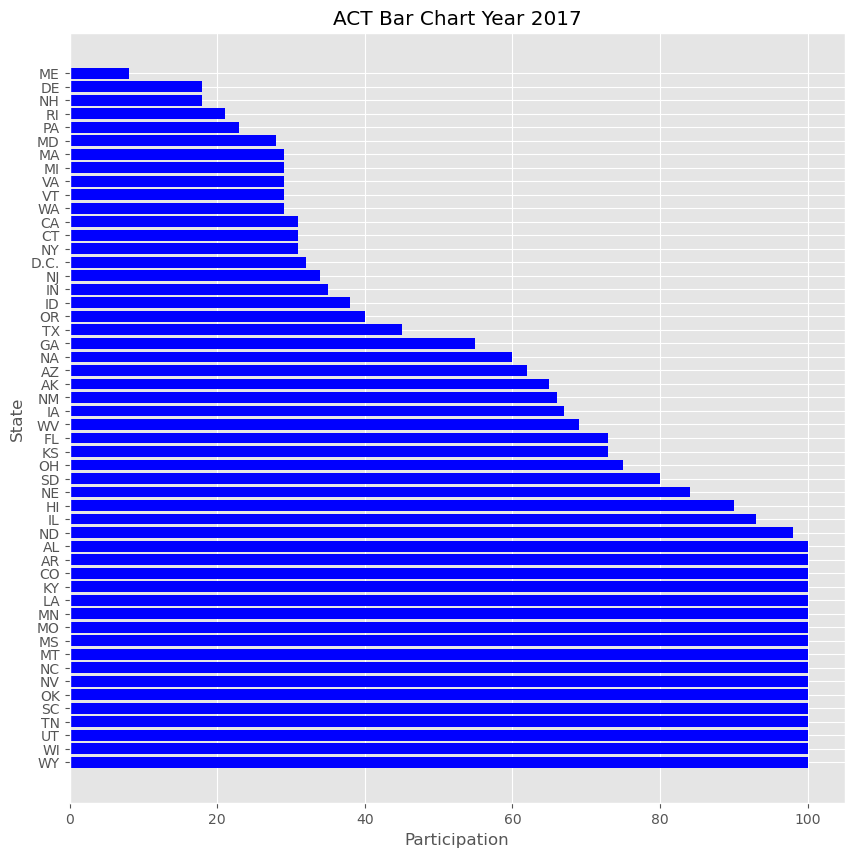

In [159]:
sorted_data = sorted(zip(act_2017_df['participation'],act_2017_df['state_abbr']), reverse=True)
sorted_values, sorted_categories = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories, sorted_values, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2017')
plt.xlabel('Participation')
plt.ylabel('State')

Text(0, 0.5, 'State')

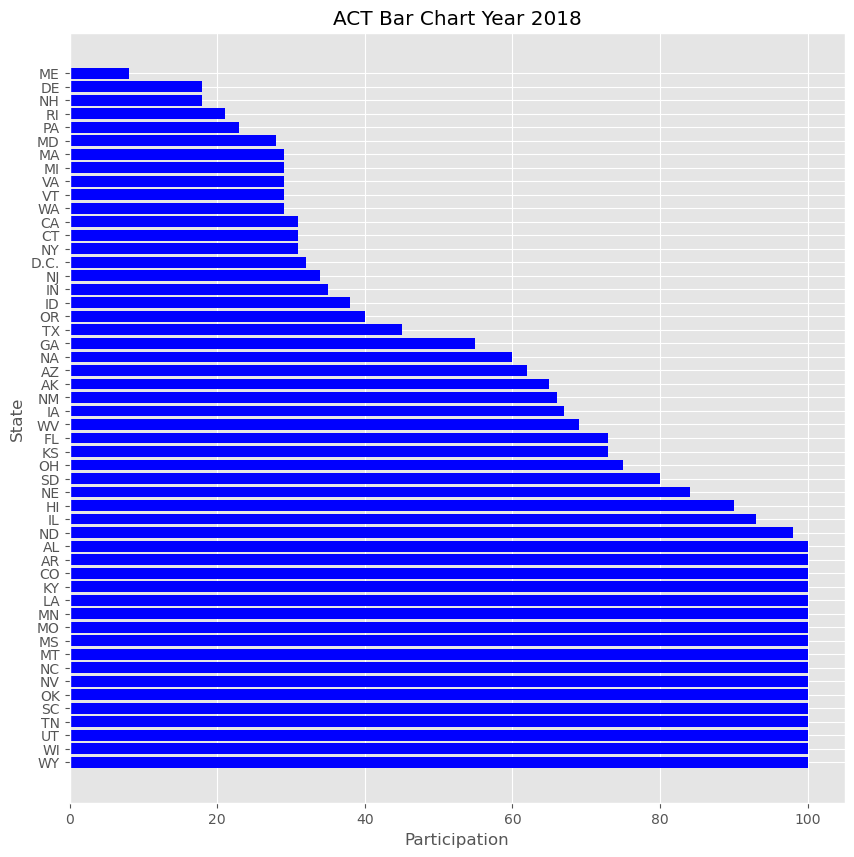

In [160]:
sorted_data2018 = sorted(zip(act_2018_df['participation'],act_2018_df['state']), reverse=True)
sorted_values2018, sorted_categories2018 = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories2018, sorted_values2018, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2018')
plt.xlabel('Participation')
plt.ylabel('State')

Text(0, 0.5, 'State')

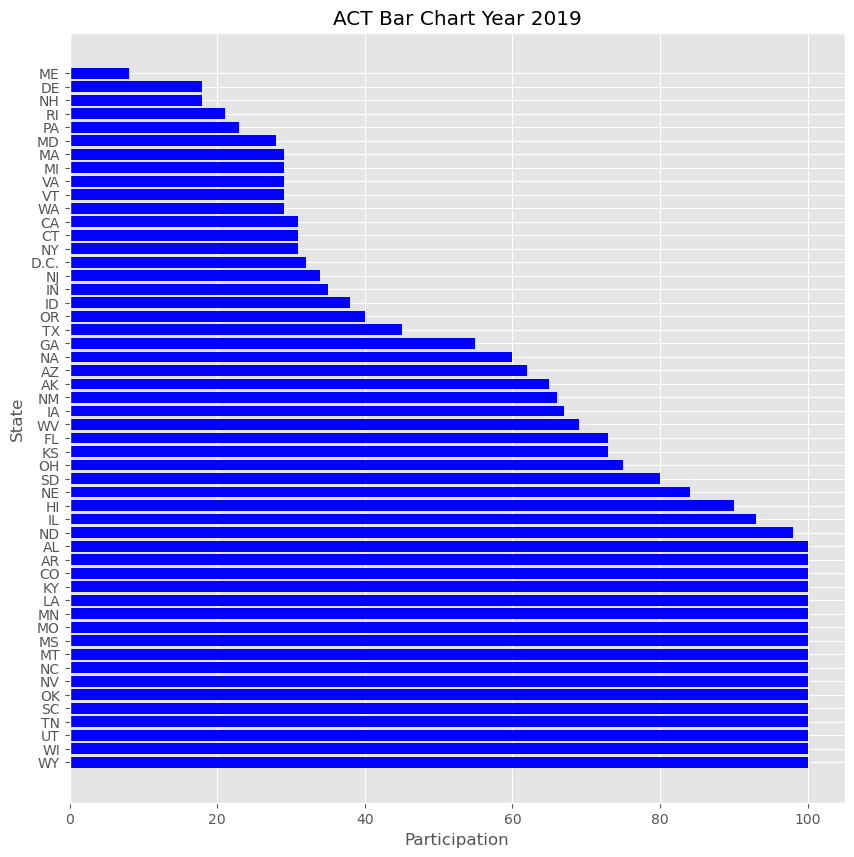

In [161]:
sorted_data2019 = sorted(zip(act_2019_df['participation'],act_2019_df['state']), reverse=True)
sorted_values2019, sorted_categories2019 = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories2019, sorted_values2019, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2019')
plt.xlabel('Participation')
plt.ylabel('State')

Text(0, 0.5, 'State')

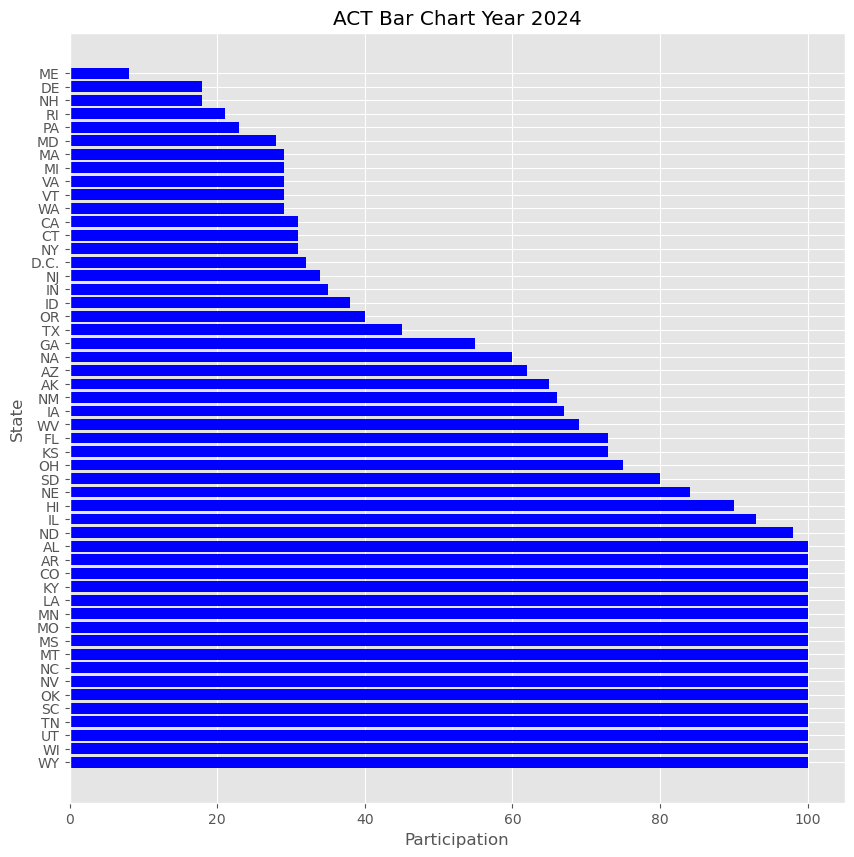

In [165]:
sorted_data2024 = sorted(zip(act_2024_df['participation'],act_2024_df['state']), reverse=True)
sorted_values2024, sorted_categories2024 = zip(*sorted_data)
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))  # Set the figure size (width, height)
plt.barh(sorted_categories2024, sorted_values2024, color='blue')
# Add title and labels
plt.title('ACT Bar Chart Year 2024')
plt.xlabel('Participation')
plt.ylabel('State')

In [166]:
# Calculate the mean population by year/state/other
mean_population = full_act.groupby('year')['participation'].mean().reset_index()

Text(0, 0.5, 'Participation Rate')

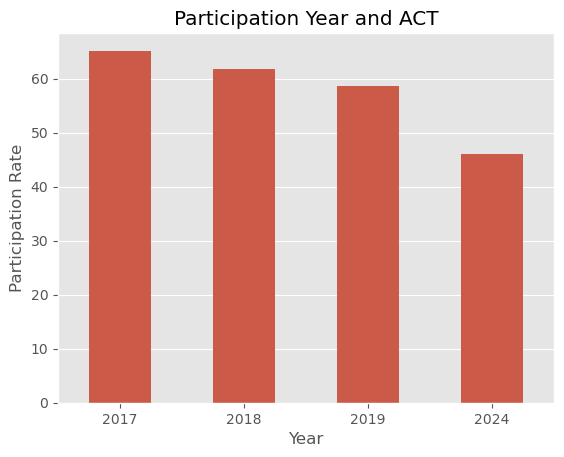

In [167]:
# Plot graph Select rows based on multiple criteria ACT / SAT / ...
sns.barplot(x='year',y='participation', data=mean_population, width=0.5)
plt.title('Participation Year and ACT');  # Reports average participation for each year
plt.xlabel('Year')
plt.ylabel('Participation Rate')

### Average ACT Score by State Year 2024

In [149]:
average_atc_2024.head()

,state,AverageACTScorePercentOfGraduatesTested,AverageACTScoreComposite,AverageACTScoreEnglish,AverageACTScoreMath,AverageACTScoreReading,AverageACTScoreScience,state_abbr
0,Alabama,100,18.0,17.3,17.4,18.5,18.2,AL
1,Alaska,14,20.4,19.3,20.0,21.4,20.4,AK
2,Arizona,64,18.4,17.3,18.5,18.8,18.5,AZ
3,Arkansas,93,18.8,18.3,18.1,19.2,19.1,AR
4,California,4,26.5,26.9,25.6,27.3,25.8,CA


In [150]:
average_atc_2024['state_abbr'] = average_atc_2024['state'].apply(get_state_abbreviation)

In [151]:
df = average_atc_2024
Top_sorted_df = df.sort_values(by='AverageACTScorePercentOfGraduatesTested', ascending=False)
Bottom_sorted_df = df.sort_values(by='AverageACTScorePercentOfGraduatesTested', ascending=True)

In [152]:
df.shape

(51, 8)

In [153]:
Top_sorted_df.head(10)

,state,AverageACTScorePercentOfGraduatesTested,AverageACTScoreComposite,AverageACTScoreEnglish,AverageACTScoreMath,AverageACTScoreReading,AverageACTScoreScience,state_abbr
0,Alabama,100,18.0,17.3,17.4,18.5,18.2,AL
18,Louisiana,100,18.1,17.6,17.4,18.6,18.3,LA
42,Tennessee,100,18.6,18.0,18.1,19.0,18.6,TN
28,Nevada,100,17.3,16.1,17.1,17.8,17.6,NV
24,Mississippi,100,17.8,17.2,17.4,18.2,18.0,MS
50,Wyoming,100,19.2,18.1,18.9,20.0,19.5,WY
34,North Dakota,96,19.2,17.9,19.1,19.7,19.6,ND
17,Kentucky,96,18.6,17.8,18.0,19.2,18.7,KY
36,Oklahoma,94,17.9,17.0,17.3,18.6,18.2,OK
27,Nebraska,94,19.4,18.6,19.1,19.8,19.6,NE


In [154]:
Bottom_sorted_df.head(10)

,state,AverageACTScorePercentOfGraduatesTested,AverageACTScoreComposite,AverageACTScoreEnglish,AverageACTScoreMath,AverageACTScoreReading,AverageACTScoreScience,state_abbr
19,Maine,2,25.1,25.2,23.7,26.2,24.6,ME
4,California,4,26.5,26.9,25.6,27.3,25.8,CA
29,New Hampshire,5,25.7,25.7,25.0,26.5,25.2,NH
39,Rhode Island,5,25.2,25.3,24.0,26.2,24.7,RI
7,Delaware,5,24.9,25.3,23.6,26.1,24.3,DE
47,Washington,7,24.6,24.3,23.6,25.6,24.3,WA
38,Pennsylvania,7,24.4,24.3,23.7,25.2,24.0,PA
37,Oregon,7,23.0,22.5,22.0,24.2,22.8,OR
22,Michigan,8,24.6,24.7,23.9,25.2,24.2,MI
45,Vermont,8,23.7,23.4,22.4,25.0,23.5,VT


Text(0.5, 0.98, 'Average ACT Score Percent Of Graduates Tested Categorical by State Plotting')

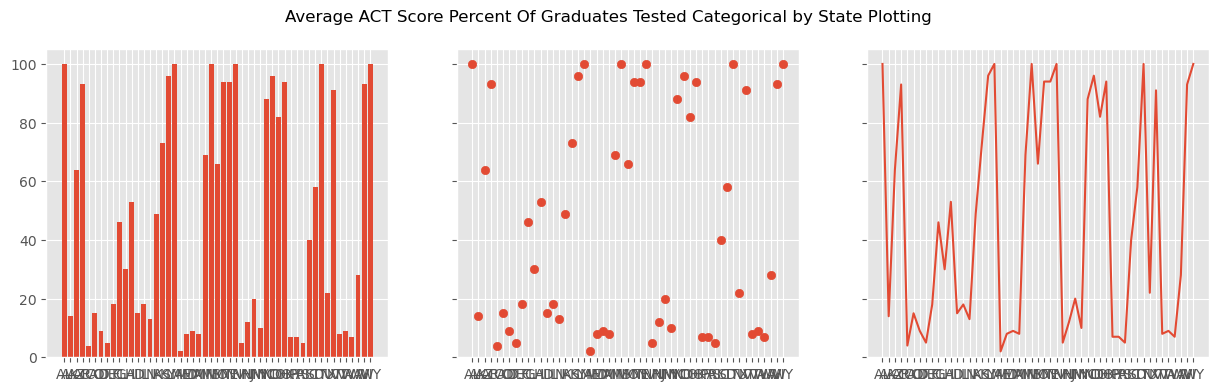

In [155]:
data = average_atc_2024
names = average_atc_2024['state_abbr']
values = average_atc_2024['AverageACTScorePercentOfGraduatesTested']

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Average ACT Score Percent Of Graduates Tested Categorical by State Plotting')